# RNN

## RNN的API接口
* SimpleRNN
* SimpleRNNCell
* LSTM
* LSTMCell
* GRU
* GRUCell
* RNN

tf.keras.layer.SimpleRNNCell在整个时间序列输入中处理一个步骤， 而tf.keras.layer.SimpleRNN处理整个序列

In [ ]:
rnn = tf.keras.layers.RNN(
    tf.keras.layers.SimpleRNNCell(4),
    return_sequences=True,
    return_state=True)

### RNN参数

* cell: 一个RNN单元实例。RNN单元是一个具有以下几项的类：
    * 一个call(input_at_t, states_at_t)方法，它返回(output_at_t, states_at_t_plus_1)。单元的调用方法也可以引入可选参数constants.
    * 一个state_size属性。这可以是单个整数（单个状态），在这种情况下，它是循环层状态的大小（应该与单元输出的大小相同）。这也可以是整数表示的列表/元组（每个状态一个大小）。
    * 一个output_size属性。这可以是单个整数或者是一个TensorShape,它表示输出的尺寸。出于向后兼容的原因，如果此属性对于当前单元不可用，则该值将由state_size的第一个元素推断。
    * cell也可能是RNN单元实例的列表，在这种情况下，RNN的单元将堆叠在另一个单元上，实现高效的堆叠RNN

### RNN扩展
* 长期依赖问题 LSTM
* 如何解决梯度消失问题
* LSTM参数太多-GRU

## Word2Vec

one-hot表示：维度灾难、语义鸿沟；

分布表示(distributed representation):
* 矩阵分解(LSA):利用全局预料特征，但SVD求解计算复杂度大；
* 基于NNLM/RNNLM的词向量：词向量是副产物，存在效率不高等问题；
* word2vec、fastText:优化效率高，但是基于局部语料
* glove:基于全局语料，结合了LSA和word2vec的优点
* elmo、GPT、bert：动态特征；

In [4]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

In [ ]:
train = pd.read_csv('./cnews/train.tsv', sep='\t', header=None, names=['label','content'])
val = pd.read_csv('./cnews/dev.tsv', sep='\t', header=None, names=['label','content'])
test = pd.read_csv('./cnews/test.tsv', sep='\t', header=None, names=['label','content'])

In [ ]:
# 分词 jieba，pkuseg

In [7]:
import jieba
def content_cut(x):
    x = jieba.lcut(x)
    x = " ".join(x)
    return x

In [ ]:
train['content'] = train['content'].map(lambda x: content_cut(x))
val['content'] = val['content'].map(lambda x: content_cut(x))
test['content'] = test['content'].map(lambda x: content_cut(x))

In [ ]:
df = pd.concat([train,val,test], axis=0)

### 训练Word2vec

In [ ]:
sentences = [document.split(' ' for document in df['content'].values)]

In [ ]:
model = Word2Vec(sentences=sentences,
                size=200,
                alpha=0.025,
                window=5,
                min_count=2,
                sample=0.001,
                seed=2019,
                workers=11,
                min_alpha=0.0001,
                sg=0, #cbow
                hs=0, #负采样
                negative=5,#负采样个数
                ns_exponent=0.75,
                cbow_mean=1,
                iter=10,
                compute_loss=True
                )

In [ ]:
model.save("./word2vec/word2vec_word_200")

In [ ]:
model.load("./word2vec/word2vec_word_200")

## 实战：LSTM新闻分类算法

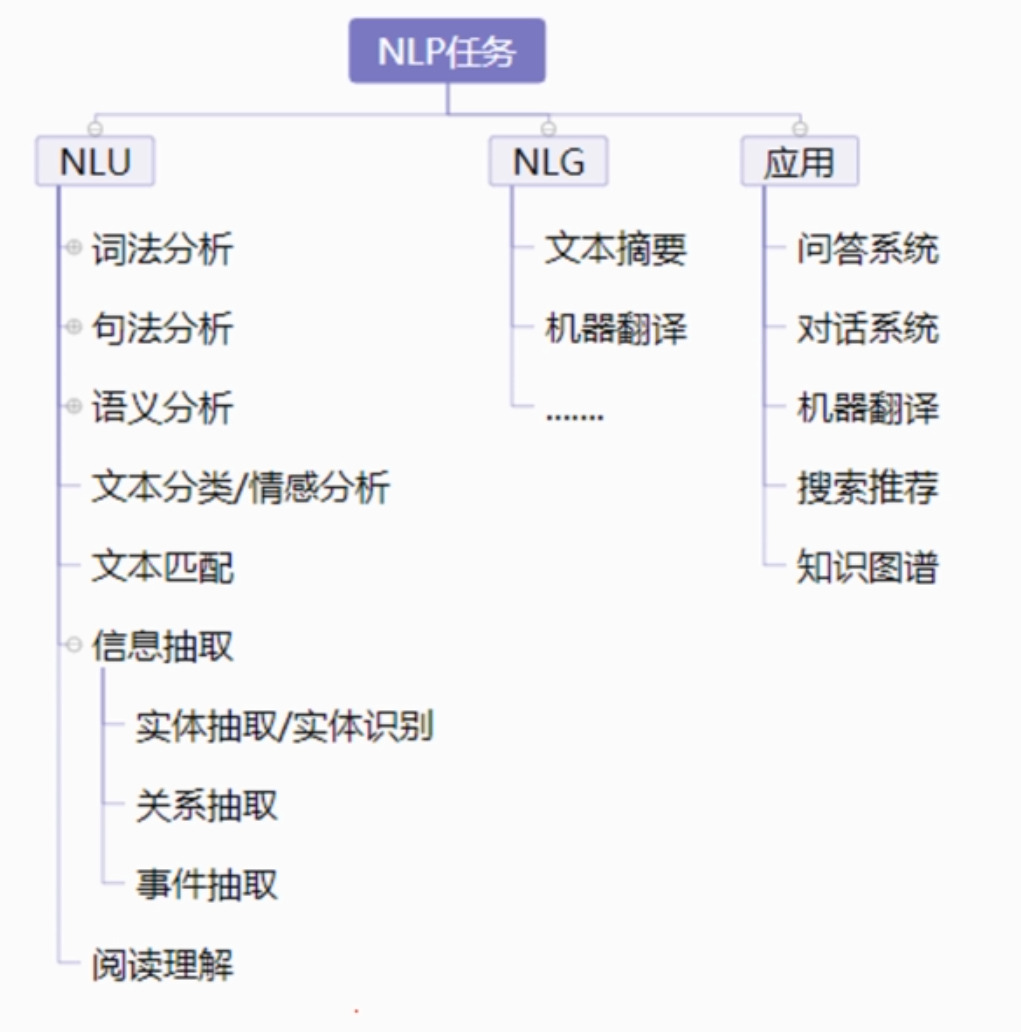

* NLU 理解
* NLG 生成

In [11]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import tensorflow as tf

In [ ]:
train = pd.read_csv('./cnews/train.tsv', sep='\t', header=None, names=['label','content'])
val = pd.read_csv('./cnews/dev.tsv', sep='\t', header=None, names=['label','content'])
test = pd.read_csv('./cnews/test.tsv', sep='\t', header=None, names=['label','content'])

In [13]:
import jieba
def content_cut(x):
    x = jieba.lcut(x)
    x = " ".join(x)
    return x

In [14]:
df = pd.concat([train, val, test], axis=0)

NameError: name 'train' is not defined

In [15]:
df['content_len'] = df['content'].map(lambda x: len(x.split(" ")))

NameError: name 'df' is not defined

In [16]:
np.percentile(df['content_len'].values, 80)

NameError: name 'df' is not defined

In [17]:
# 数据分析

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 10))
plt.plot(df['content_len'].tolist(), marker='*', markerfacecolor='red')
plt.axhline(y=np.mean(df['content_len'].tolist()), color="black",)
plt.axhline(y=np.percentile(df['content_len'].values, 90), color="peru")
plt.axhline(y=np.percentile(df['content_len'].values, 98), color="orange")

NameError: name 'df' is not defined

<Figure size 1440x720 with 0 Axes>

In [19]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
count_class = train['label'].value_counts()
plt.figure(figsize=(20,8))
class_bar = plt.bar(x=count_class.index, height=count_class.tolist(), width=0.4, color='lightcoral')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for bar in class_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1,str(height), ha="center", va="bottom", fontsize=20)
    
plt.ylabel("Sample Count", fontsize=25)
plt.xlabel("类别名称", fontsize=25)

NameError: name 'train' is not defined

In [20]:
import os
file_name = './embedding/Word2Vec_word_200.model'
if not os.path.exists(file_name):
    model = Word2Vec([document.split(' ') for document in df['content'].values],
                    size=200,
                    window=5,
                    iter=10,
                    workers=11,
                    seed=2019,
                    min_count=2)
    model.save(file_name)
else:
    model = Word2Vec.load(file_name)
print("add word2vec finished....")

NameError: name 'df' is not defined

In [21]:
train['content'][0]

NameError: name 'train' is not defined

In [22]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=50000,
                                                 lower=False, filters="")
tokenizer.fit_on_texts(df['content'].tolist())

train_ = tokenizer.texts_to_sequences(train['content'].values)
val_ = tokenizer.texts_to_sequences(val['content'].values)
test_ = tokenizer.texts_to_sequences(test['content'].values)

NameError: name 'df' is not defined

In [23]:
# word embedding

In [24]:
word_vocab = tokenizer.word_index
count = 0

embedding_matrix = np.zeros((len(word_vocab) + 1, 200))
for word, i in word_vocab.items():
    embedding_vector = model.wv[word] if word in model else None
    if embedding_vector is not None:
        count += 1
        embedding_matrix[i] = embedding_vector
    else:
        unk_vec = np.random.random(200) * 0.5
        unk_vec = unk_vec - unk_vec.mean()
        embedding_matrix[i] = unk_vec

In [25]:
train.head()

NameError: name 'train' is not defined

In [26]:
#Label 编码
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
train_label = lb.fit_transform(train['label'].values)
val_label = lb.transform(val['label'].values)
test_label = lb.transform(test['label'].values)

NameError: name 'train' is not defined

In [27]:
# 建模

In [28]:
content = tf.keras.layers.Input(shape=(800,), dtype='int32')
embedding = tf.keras.layers.Embedding(
    name="word_embedding",
    input_dim=embedding_matrix.shape[0],
    weights=[emdbedding_matrix],
    output_dim=embedding_matrix.shape[1],
    trainable=False)

x = tf.keras.layers.SpatialDropout1D(0.2)(embedding(content))

x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(200, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(200, return_sequences=True))(x)

avg_pool = tf.keras.layers.GlobalAveragePooling1D()(x)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(x)

conc = tf.keras.layers.concatenate([avg_pool, max_pool])

x = tf.keras.layers.Dense(1000)(conc)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(500)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation="relu")(x)
x = tf.keras.layers.Dense(10)(x)
output = tf.nn.softmax(x)

model = tf.keras.models.Model(inputs=content, outputs=output)

NameError: name 'emdbedding_matrix' is not defined

In [29]:
train_label

NameError: name 'train_label' is not defined

In [30]:
len(train_[0])

NameError: name 'train_' is not defined

In [ ]:
train_ = tf.keras.preprocessing.sequence.pad_sequences(train_, maxlen=800)
val_ = tf.keras.preprocessing.sequence.pad_sequences(val_, maxlen=800)
test_ = tf.keras.preprocessing.sequence.pad_sequences(test_, maxlen=800)

In [ ]:
train_label = tf.keras.utils.to_categorical(train_label, num_classes=10, dtype='int')
val_label = tf.keras.utils.to_categorical(val_label, num_classes=10, dtype='int')
test_label = tf.keras.utils.to_categorical(test_label, num_classes=10, dtype='int')

In [ ]:
train_label.shape

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_, train_label))

In [ ]:
train_label

In [ ]:
train_dataset = train_dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size = 23000)
train_dataset = train_dataset.batch(buffer_size = 128)

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_, val_label))
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 23000)
val_dataset = val_dataset.batch(buffer_size = 256)

In [ ]:
for a, b in train_dataset.take(1):
    print(a.shape, b.shape)

In [ ]:
learning_rate = 0.001

loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.kears.metrics.CategoricalCrossentropy(name='train_accuracy')

test_loss = tf.kears.metrics.Mean(name='test_loss')
test_accuracy = tf.kears.metrics.CategoricalCrossentropy(name='test_accuracy')

def train_one_step(contents, labels):
    with tf.GradientTape() as tape:
        predictions = model(contents)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss) # update 省去了显示update
    train_accuracy(labels, predictions)

def test_one_step(contents, labels):
    predictions = model(contents)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [ ]:
EPOCHS=10
for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for content, labels in train_dataset:
        train_one_step(content, labels)
        
    for val_content, val_labels in val_dataset:
        test_one_step(val_content, val_labels)
        
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    
    print(template.format(epoch + 1,
                         train_loss.result(),
                         train_accuracy.result() * 100,
                         test_loss.result(),
                         test_accuracy.result() * 100
                         ))

In [ ]:
model.summary()

In [ ]:
model(tf.constant([test_[1]]))

In [ ]:
test_label[0]

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_)
test_dataset = test_dataset.batch(batch_size=256)

In [ ]:
predictions=[]
for line in test_dataset:
    prediction = model(line)
    predictions.extend(list(np.argmax(prediction.numpy(), axis=1)))

In [ ]:
test_.shape

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_true = list(np.argmax(test_label, axis=1))

In [ ]:
accuracy_score(test_true, predictions)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_true, predictions, target_names=list(lb.classes_)))

### 问题

* 文本分类中还有哪些问题
   * 标注质量要高
   * 文本过长、过短
* 文本分类的模型
* 一些细节的原理